# Data Exploration/Presentation

In this Notebook we will discuss preliminary exploration of a dataset. In the first example, the target column (what we want to predict, based off of data from the remaining columns) is `class`.

In [15]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# load the data
adult_census = pd.read_csv("datasets/adult-census.csv")

# get a preview of the dataset
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [17]:
# get an overview of the continuous (numerical) columns
adult_census.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
# explore the target
target_column = 'class'
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

<AxesSubplot:>

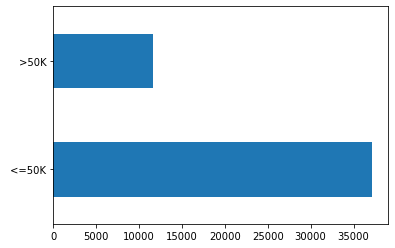

In [25]:
# We can see graphically that the target classes are imbalanced
adult_census[target_column].value_counts().plot.barh()

In [20]:
# check the number of samples and columns
print(f"The dataset contains {adult_census.shape[0]} samples and "
      f"{adult_census.shape[1]} columns.\n"
      f"The dataset contains {adult_census.shape[1] - 1} features and 1 target.")

The dataset contains 48842 samples and 14 columns.
The dataset contains 13 features and 1 target.


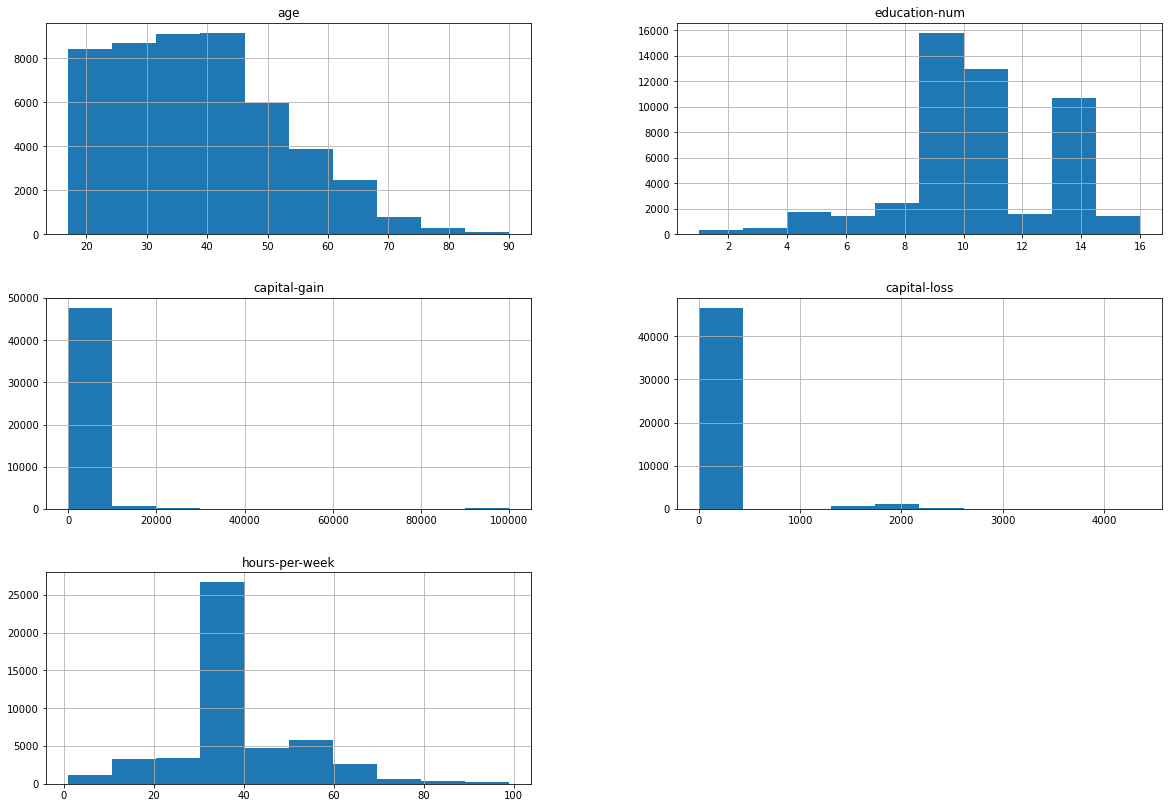

In [21]:
# look at the distribution of the different (continous) features
_ = adult_census.hist(figsize=(20, 14))

<u>Insights:</u>
- `age`: there are not that many points for `age > 7`. The dataset description does indicate that retired people have been filtered out (hours-per-week > 0);

- `education-num`: peak at 10 and 13, hard to tell what it corresponds to without looking much further;

- `hours-per-week` peaks at 40, this was very likely the standard number of working hours at the time of the data collection;

- most values of `capital-gain` and `capital-loss` are close to zero.

In [22]:
# examine the relationship between education and education-num
pd.crosstab(index=adult_census['education'],
            columns=adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


We can see that the two columns contain the __same__ information.

Another way to inspect the data is to do a `pairplot` and show how each variable differs according to our target, `class`. Plots along the diagonal show the distribution of individual variables for each class. The plots on the off-diagonal can reveal interesting interactions between variables.

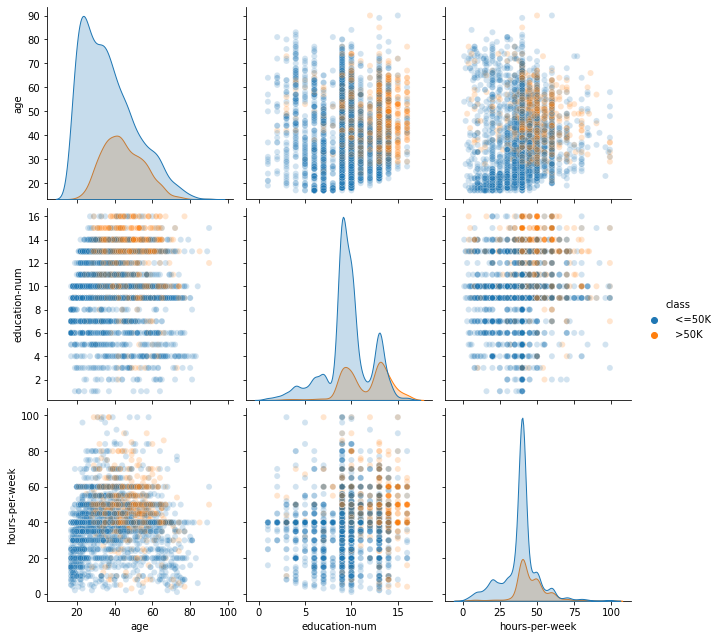

In [27]:
# We will plot a subset of the data to keep the plot readable and make the
# plotting faster, but works on the assumption that the data is UNORDERED
n_samples_to_plot = 5000

columns = ['age', 'education-num', 'hours-per-week']


_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3)

#alternatively can use histograms on the diagonals:
''' 
_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})
                 
'''

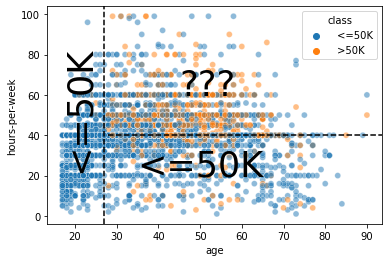

In [24]:
# look at one pairplot
ax = sns.scatterplot(
    x="age", y="hours-per-week", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)
# add category borders manually
age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

# add border annotations
plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

Missing:
1) Missing values